Objective of this project is using historical data and whether forcast predict bikes rental demand

We will have below features for this project:

instant: record index

dteday : date

season: season (1: springer, 2: summer, 3: fall, 4: winter)

yr: year (0: 2011, 1:2012)

mnth: month (1 to 12)

hr: hour (0 to 23)

holiday: whether the day is a holiday or not

weekday: day of the week

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered users

The "target" data set ('y') should have only one 'label' i.e. 'cnt'.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)

In [2]:
filepath = "/content/sample_data/Bike_Assessment/bikes.csv"

In [3]:
bikesdata = pd.read_csv(filepath)

In [4]:
bikesdata.describe()

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.0000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.0000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13033.5000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17378.0000,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bikesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   instant     17379 non-null  int64  
 2   dteday      17379 non-null  object 
 3   season      17379 non-null  int64  
 4   yr          17379 non-null  int64  
 5   mnth        17379 non-null  int64  
 6   hr          17379 non-null  int64  
 7   holiday     17379 non-null  int64  
 8   weekday     17379 non-null  int64  
 9   workingday  17379 non-null  int64  
 10  weathersit  17379 non-null  int64  
 11  temp        17379 non-null  float64
 12  atemp       17379 non-null  float64
 13  hum         17379 non-null  float64
 14  windspeed   17379 non-null  float64
 15  casual      17379 non-null  int64  
 16  registered  17379 non-null  int64  
 17  cnt         17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [6]:
bikesdata["yr"].unique()

array([0, 1])

In [7]:
bikesdata["yr"].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [8]:
bikesdata.describe()

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.0000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.0000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13033.5000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17378.0000,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
columnsToDrop = {'instant','casual','registered','atemp','dteday'}

In [10]:
bikesData = bikesdata.drop(columnsToDrop,axis=1)

In [11]:
bikesData

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [12]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.7 MB


In [13]:
np.random.seed(42)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [16]:
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

In [17]:
train_set.sort_values('dayCount', axis= 0, inplace=True)

In [18]:
test_set.sort_values('dayCount', axis= 0, inplace=True)


In [19]:
print("Train Set: ", len(train_set), " Test Set: ", len(test_set))

Train Set:  12165  Test Set:  5214


In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [21]:
columnsToScale = ["temp","hum","windspeed"]

In [22]:
scaler = StandardScaler()

In [23]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

In [24]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

In [25]:
display_scores(train_set)

Scores:        Unnamed: 0  season  yr  mnth  hr  holiday  weekday  workingday  \
1               1       1   0     1   1        0        6           0   
2               2       1   0     1   2        0        6           0   
4               4       1   0     1   4        0        6           0   
6               6       1   0     1   6        0        6           0   
7               7       1   0     1   7        0        6           0   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17372       17372       1   1    12  17        0        1           1   
17373       17373       1   1    12  18        0        1           1   
17374       17374       1   1    12  19        0        1           1   
17376       17376       1   1    12  21        0        1           1   
17378       17378       1   1    12  23        0        1           1   

       weathersit      temp       hum  windspeed  cnt    dayCount  
1               1 -1.440143  0.892500  -1.55267

In [26]:
display_scores(test_set)

Scores:        Unnamed: 0  season  yr  mnth  hr  holiday  weekday  workingday  \
0               0       1   0     1   0        0        6           0   
3               3       1   0     1   3        0        6           0   
5               5       1   0     1   5        0        6           0   
8               8       1   0     1   8        0        6           0   
14             14       1   0     1  14        0        6           0   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17354       17354       1   1    12  23        0        0           0   
17355       17355       1   1    12   0        0        1           1   
17367       17367       1   1    12  12        0        1           1   
17375       17375       1   1    12  20        0        1           1   
17377       17377       1   1    12  22        0        1           1   

       weathersit      temp       hum  windspeed  cnt    dayCount  
0               1 -1.336557  0.944231  -1.55267

In [27]:
train_set.describe()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,1.216500e+04,1.216500e+04,1.216500e+04,12165.000000,12165.000000
mean,8701.248911,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,-1.869081e-17,2.371396e-16,5.607242e-17,191.237649,362.552038
std,5030.228339,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,1.000041e+00,1.000041e+00,1.000041e+00,182.900931,209.592847
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000e+00,-3.245965e+00,-1.552670e+00,1.000000,0.041667
25%,4352.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.186290e-01,-7.628859e-01,-6.962541e-01,40.000000,181.333333
50%,8683.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.005628e-02,1.307622e-02,-2.069907e-01,145.000000,361.791667
75%,13088.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.387416e-01,8.407692e-01,5.264946e-01,282.000000,545.333333
max,17378.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.599698e+00,1.927116e+00,5.419128e+00,976.000000,724.083333


In [28]:
test_set.describe()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,8660.421557,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.018492,-0.004197,0.017498,185.322785,360.850898
std,4986.462636,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.990859,0.993451,1.008611,177.755171,207.769276
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000,-3.245965,-1.552670,1.000000,0.000000
25%,4338.750000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.818629,-0.762886,-0.696254,41.000000,180.781250
50%,8697.000000,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.010056,0.013076,0.037231,136.000000,362.375000
75%,12890.500000,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.735156,0.789038,0.526495,277.000000,537.104167
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.392526,1.927116,5.419128,977.000000,724.041667


In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [30]:
from xgboost import XGBRegressor

In [31]:
trainingCols = train_set.drop('cnt', axis=1)

In [32]:
trainingLabels = train_set['cnt']

Train and Analyze the Models - Train DecisionTree Model

In [33]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [36]:
dec_reg = DecisionTreeRegressor()

In [39]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

In [40]:
display_scores(dt_mae_scores)

Scores: [43.57682827 48.32867707 35.49630238 43.4042728  47.55464256 74.48355263
 58.73190789 47.609375   51.25411184 95.57565789]
Mean: 54.60153283527224
Standard deviation: 16.88866213711995


In [41]:
dec_reg = DecisionTreeRegressor()

In [42]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

In [43]:
display_scores(dt_mse_scores)

Scores: [ 68.74932733  75.40138553  61.51876747  72.14302078  73.38610872
 119.8500365   97.2130181   80.37970642  86.43440432 148.59071802]
Mean: 88.3666493192014
Standard deviation: 25.544655123112832


Train and Analyze the Models - Train Linear Regression Model

In [44]:
lin_reg = LinearRegression()

In [45]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

In [46]:
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.4324125694219
Standard deviation: 31.426965705294986


In [47]:
lin_reg = LinearRegression()

In [48]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

In [49]:
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181785
Standard deviation: 37.55565075919557


Train and Analyze the Models - Train Random Forest Model

In [50]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

In [51]:
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

In [52]:
display_scores(rf_mae_scores)

Scores: [33.53095042 33.60056971 28.51831827 31.7567461  36.3404711  57.91441338
 40.94366776 41.08554276 37.40252193 84.41997807]
Mean: 42.55131795047139
Standard deviation: 15.917782327740094


In [56]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

In [57]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

In [58]:
display_scores(rf_mse_scores)

Scores: [ 46.06675277  51.09757501  43.33199324  52.15146392  60.20012733
  94.59207905  66.53577778  65.75401081  61.53320265 131.77628762]
Mean: 67.30392701917076
Standard deviation: 25.50686222972957


Fine-Tuning the Selected Model - Choosing set of hyperparameter combinations for Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth' : [15,28]},
]

In [61]:
grid_search = GridSearchCV(forest_reg, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")

In [62]:
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, random_state=42),
             param_grid=[{'max_depth': [15, 28], 'max_features': [10, 12],
                          'n_estimators': [120, 150]}],
             scoring='neg_mean_squared_error')

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, max_features=12, n_estimators=150,
                      random_state=42)

In [64]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 12, 'n_estimators': 150}

In [65]:
grid_search.best_score_

-5041.533242483628

In [66]:
grid_search.best_index_

3

Fine-Tuning the Selected Model - Run GridSearchCV

In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [68]:
print(feature_importances)

[8.41839970e-02 2.14103239e-03 5.29748135e-04 3.37431466e-03
 5.87256305e-01 2.18324766e-03 1.39883300e-02 7.74749867e-02
 1.69440973e-02 9.02691708e-02 2.59127512e-02 7.42765527e-03
 8.83143641e-02]


Evaluate the model on test - Preparing to test the final model on Test dataset

In [69]:
final_model = grid_search.best_estimator_

In [80]:
test_set.sort_values('dayCount',axis=0,inplace=True)

In [81]:
test_x_cols = test_set.drop("cnt",axis=1)

In [82]:
test_x_cols = test_x_cols.columns.values

In [83]:
test_y_cols = "cnt"

In [84]:
X_test = test_set.loc[:,test_x_cols]

In [85]:
test_y_cols

'cnt'

In [86]:
y_test = test_set.loc[:,test_y_cols]

In [87]:
test_set.loc[:,"predictedCounts_test"] = final_model.predict(X_test)


In [88]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])

In [89]:
final_mse = np.sqrt(mse)

In [90]:
print("final_mse: " ,final_mse)

final_mse:  40.10426310561357


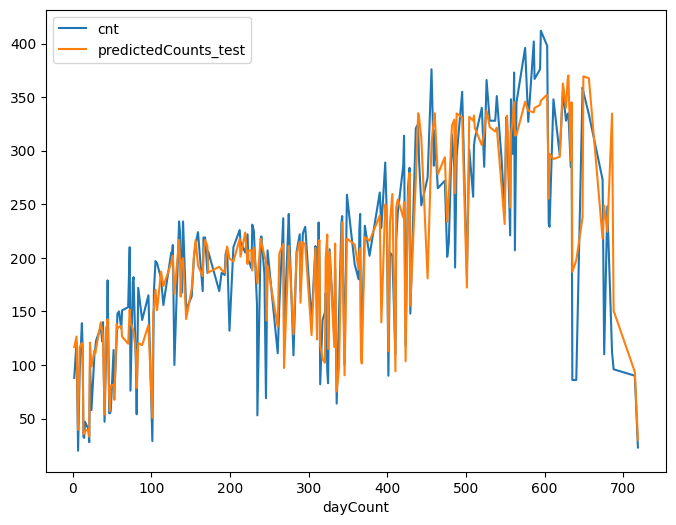

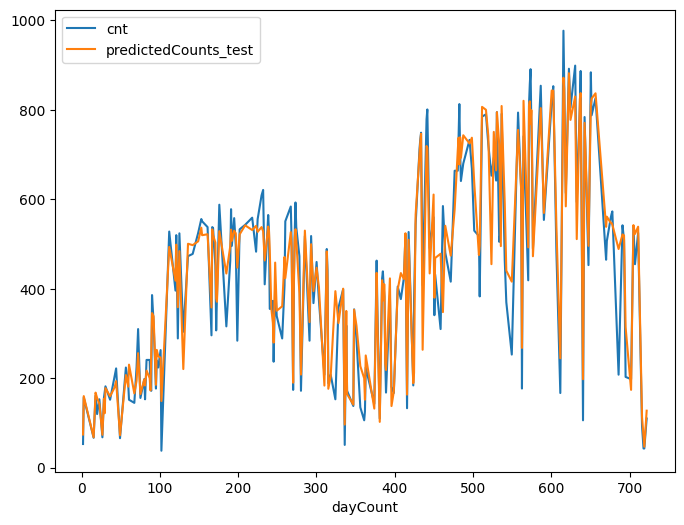

In [91]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()